In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV

In [3]:
from datetime import date
from datetime import datetime
import numpy as np
import holidays
us_holidays = holidays.UnitedStates()
today = datetime.now()


# Agilent Tech

In [4]:
stocks_a = pd.read_csv('D:\\MSC Sem 3\\Stock Market\\Stocks\\a.us.csv',parse_dates = True, index_col = 'Date')

In [5]:
stocks_a = stocks_a[['Close']]

In [6]:
# A variable for predicting n days out into future
forecast_out1 = 1
# Create dependent variable
stocks_a['Prediction'] = stocks_a[['Close']].shift(-forecast_out1)

In [7]:
X1 = stocks_a.drop(['Prediction'],1)

In [8]:
Y1 = stocks_a['Prediction']

In [9]:
X1 = X1[:-forecast_out1]
Y1 = Y1[:-forecast_out1]

In [10]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1)

In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X1_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [12]:
X1_train = scaler.transform(X1_train)
X1_test = scaler.transform(X1_test)

In [13]:
mlp = MLPRegressor(solver = 'lbfgs', momentum=0.385, learning_rate_init = 0.9390000000000001, learning_rate= 'constant',hidden_layer_sizes = (50,100,50),alpha=0.05,activation = 'identity')

In [14]:
mlp.fit(X1_train,Y1_train)

MLPRegressor(activation='identity', alpha=0.05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 100, 50), learning_rate='constant',
       learning_rate_init=0.9390000000000001, max_iter=200, momentum=0.385,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [15]:
threshold = mlp.score(X1_test,Y1_test)
print(threshold)

0.9964070974978833


In [16]:
today = datetime.now()

In [17]:
last_date = stocks_a.iloc[-1].name
days = today - last_date
d  = days.days
forecast_out1 = 1
while True:
    X1_lately = X1[-forecast_out1:]
    forecast_set1 = mlp.predict(X1_lately)
    forecast_out1 = forecast_out1 + 1
    if forecast_out1 > d:
        break


In [26]:
forecast_set1

array([4069.47966599, 4101.62135513, 4115.23901781, 4130.65901821,
       4116.14018667, 4163.90213594, 4121.04655043, 4095.71369264,
       4117.14148539, 4049.95434082, 4070.48096472, 3962.54096196,
       3983.56823523, 4008.30031378, 3985.57083268, 4077.49005581,
       4054.76057471, 4107.62914749, 4116.14018667, 4116.14018667,
       4115.23901781, 4007.29901506, 3979.76330007, 3969.34979331,
       4018.91408029, 4078.59148441, 4061.86979567, 4046.3496654 ,
       4110.93343329, 4099.01797844, 4148.78252516, 4131.0595377 ,
       4153.68888893, 4257.02291754, 4207.35850069, 4210.26226699,
       4240.60161842, 4216.06979961, 4201.55096807, 4221.87733223,
       4192.73953927, 4175.21681155, 4166.30525288, 4153.68888893,
       4103.9243422 , 4123.44966737, 4101.92174475, 4044.44719782,
       4089.20525091, 4099.91914729, 4065.87499058, 4065.87499058,
       4086.20135473, 4154.69018765, 4166.30525288, 4097.01538098,
       4087.20265346, 4110.93343329, 4109.93213456, 4167.30655

In [18]:
last_date = stocks_a.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day
next_date = datetime.fromtimestamp(next_unix)


for i in forecast_set1:
    if datetime.weekday(next_date) == 5 & datetime.weekday(next_date) == 6:
        continue
    next_date = datetime.fromtimestamp(next_unix)
    next_unix += 86400

    stocks_a.loc[next_date] = [np.nan for _ in range(len(stocks_a.columns)-1)]+[i]
    if next_date > today:
        break
    
    
print("Today's Stock Price is : ",i)

Today's Stock Price is :  6737.747729285465


float

In [19]:
stocks_a.tail()

,Close,Prediction
Date,,
2019-09-24 05:30:00,NaN,6827.525770
2019-09-25 05:30:00,NaN,6812.562763
2019-09-26 05:30:00,NaN,6815.555365
2019-09-27 05:30:00,NaN,6801.589892
2019-09-28 05:30:00,NaN,6737.747729


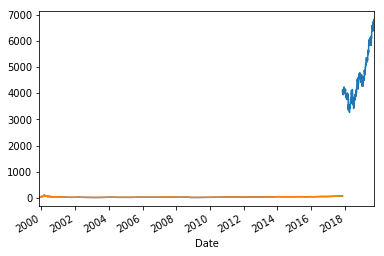

In [20]:
stocks_a['Prediction'].plot()
stocks_a['Close'].plot()

# Apple Inc

In [18]:
stocks_aapl = pd.read_csv('D:\\MSC Sem 3\\Stock Market\\Stocks\\aapl.us.csv',parse_dates = True, index_col = 'Date')

In [19]:
stocks_aapl = stocks_aapl[['Close']]

In [20]:
# A variable for predicting n days out into future
forecast_out2 = 1
# Create dependent variable
stocks_aapl['Prediction'] = stocks_aapl[['Close']].shift(-forecast_out2)

In [21]:
X2 = stocks_aapl.drop(['Prediction'],1)

In [22]:
Y2 = stocks_aapl['Prediction']

In [23]:
X2 = X2[:-forecast_out2]
Y2 = Y2[:-forecast_out2]

In [24]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,Y2)

In [25]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X2_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [26]:
X2_train = scaler.transform(X2_train)
X2_test = scaler.transform(X2_test)

In [27]:
mlp = MLPRegressor(solver = 'lbfgs', momentum=0.385, learning_rate_init = 0.9390000000000001, learning_rate= 'constant',hidden_layer_sizes = (50,100,50),alpha=0.05,activation = 'identity')
mlp.fit(X2_train,Y2_train)

MLPRegressor(activation='identity', alpha=0.05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 100, 50), learning_rate='constant',
       learning_rate_init=0.9390000000000001, max_iter=200, momentum=0.385,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [28]:
threshold = mlp.score(X2_test,Y2_test)
print(threshold)

0.9997566724170642


In [29]:
today = datetime.now()

In [30]:
last_date = stocks_aapl.iloc[-1].name
days = today - last_date
d  = days.days
forecast_out2 = 1
while True:
    X2_lately = X2[-forecast_out2:]
    forecast_set2 = mlp.predict(X2_lately)
    forecast_out2 = forecast_out2 + 1
    if forecast_out2 > d:
        break

In [34]:
last_date = stocks_aapl.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day
next_date = datetime.fromtimestamp(next_unix)


for i in forecast_set2:
    if datetime.weekday(next_date) == 5 & datetime.weekday(next_date) == 6:
        continue
    next_date = datetime.fromtimestamp(next_unix)
    next_unix += 86400

    stocks_aapl.loc[next_date] = [np.nan for _ in range(len(stocks_aapl.columns)-1)]+[i]
    if next_date >= today:
        break
        
    
    
print("Today's Stock Price is : ",i)

Today's Stock Price is :  30765.151005255455


In [35]:
stocks_aapl.tail()

,Close,Prediction
Date,,
2019-09-24 05:30:00,NaN,30173.551734
2019-09-25 05:30:00,NaN,30480.762038
2019-09-26 05:30:00,NaN,30577.313848
2019-09-27 05:30:00,NaN,30828.348554
2019-09-28 05:30:00,NaN,30765.151005


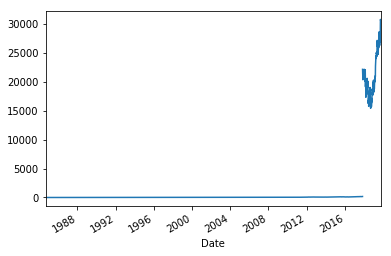

In [36]:
stocks_aapl['Prediction'].plot()

# Ford

In [31]:
stocks_f = pd.read_csv('D:\\MSC Sem 3\\Stock Market\\Stocks\\f.us.csv',parse_dates = True, index_col = 'Date')

In [32]:
stocks_f = stocks_f[['Close']]

In [33]:
# A variable for predicting n days out into future
forecast_out3 = 1
# Create dependent variable
stocks_f['Prediction'] = stocks_f[['Close']].shift(-forecast_out3)

In [34]:
X3 = stocks_f.drop(['Prediction'],1)

In [35]:
Y3 = stocks_f['Prediction']

In [36]:
X3 = X3[:-forecast_out3]
Y3 = Y3[:-forecast_out3]

In [37]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3,Y3)

In [38]:
scaler.fit(X3_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [39]:
X3_train = scaler.transform(X3_train)
X3_test = scaler.transform(X3_test)

In [40]:
mlp = MLPRegressor(solver = 'lbfgs', momentum=0.9380000000000001, learning_rate_init = 0.188, learning_rate= 'constant',hidden_layer_sizes = (50,50,50),alpha=0.05,activation = 'relu')
mlp.fit(X3_train,Y3_train)

MLPRegressor(activation='relu', alpha=0.05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
       learning_rate_init=0.188, max_iter=200, momentum=0.9380000000000001,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [41]:
threshold = mlp.score(X3_test,Y3_test)
print(threshold)

0.9989385101657796


In [42]:
last_date = stocks_f.iloc[-1].name
days = today - last_date
d  = days.days
forecast_out3 = 1
while True:
    X3_lately = X3[-forecast_out3:]
    forecast_set3 = mlp.predict(X3_lately)
    forecast_out3 = forecast_out3 + 1
    if forecast_out3 > d:
        break

In [49]:
last_date = stocks_f.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day
next_date = datetime.fromtimestamp(next_unix)


for i in forecast_set3:
    if datetime.weekday(next_date) == 5 & datetime.weekday(next_date) == 6:
        continue
    next_date = datetime.fromtimestamp(next_unix)
    next_unix += 86400

    stocks_f.loc[next_date] = [np.nan for _ in range(len(stocks_f.columns)-1)]+[i]
    if next_date >= today:
        break   
    
    
print("Today's Stock Price is : ",i)

Today's Stock Price is :  288.9886535192797


In [50]:
stocks_f.tail()

,Close,Prediction
Date,,
2019-09-24 05:30:00,NaN,296.544694
2019-09-25 05:30:00,NaN,295.836315
2019-09-26 05:30:00,NaN,291.822169
2019-09-27 05:30:00,NaN,289.460906
2019-09-28 05:30:00,NaN,288.988654


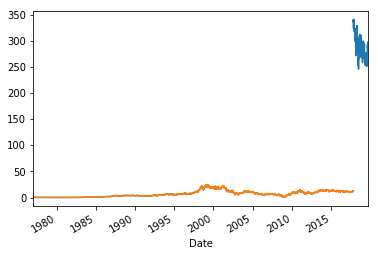

In [51]:
stocks_f['Prediction'].plot()
stocks_f['Close'].plot()

# FedEx

In [43]:
stocks_fdx = pd.read_csv('D:\\MSC Sem 3\\Stock Market\\Stocks\\fdx.us.csv',parse_dates = True, index_col = 'Date')

In [44]:
stocks_fdx = stocks_fdx[['Close']]

In [45]:
# A variable for predicting n days out into future
forecast_out4 = 1
# Create dependent variable
stocks_fdx['Prediction'] = stocks_fdx[['Close']].shift(-forecast_out4)

In [46]:
X4 = stocks_fdx.drop(['Prediction'],1)

In [47]:
Y4 = stocks_fdx['Prediction']

In [48]:
X4 = X4[:-forecast_out4]
Y4 = Y4[:-forecast_out4]

In [49]:
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4,Y4)

In [50]:
scaler4 = MinMaxScaler(feature_range=(0, 1))
scaler4.fit(X4_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [51]:
X4_train = scaler4.transform(X4_train)
X4_test = scaler4.transform(X4_test)

In [52]:
mlp = MLPRegressor(solver = 'lbfgs', momentum=0.6980000000000001, learning_rate_init = 0.506, learning_rate= 'adaptive',hidden_layer_sizes = (50,50,50),alpha=0.05,activation = 'tanh')
mlp.fit(X4_train,Y4_train)

MLPRegressor(activation='tanh', alpha=0.05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50, 50), learning_rate='adaptive',
       learning_rate_init=0.506, max_iter=200, momentum=0.6980000000000001,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [53]:
threshold = mlp.score(X4_test,Y4_test)
print(threshold)

0.9988411467588747


In [54]:
last_date = stocks_fdx.iloc[-1].name
days = today - last_date
d  = days.days
forecast_out4 = 1
while True:
    X4_lately = X4[-forecast_out4:]
    forecast_set4 = mlp.predict(X4_lately)
    forecast_out4 = forecast_out4 + 1
    if forecast_out4 > d:
        break

In [64]:
last_date = stocks_fdx.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day
next_date = datetime.fromtimestamp(next_unix)


for i in forecast_set4:
    if datetime.weekday(next_date) == 5 & datetime.weekday(next_date) == 6:
        continue
    next_date = datetime.fromtimestamp(next_unix)
    next_unix += 86400

    stocks_fdx.loc[next_date] = [np.nan for _ in range(len(stocks_fdx.columns)-1)]+[i]
    if next_date >= today:
        break
        
    
    
print("Today's Stock Price is : ",i)

Today's Stock Price is :  215.04381409401594


In [65]:
stocks_fdx.tail()

,Close,Prediction
Date,,
2019-09-24 05:30:00,NaN,215.044734
2019-09-25 05:30:00,NaN,215.044351
2019-09-26 05:30:00,NaN,215.044378
2019-09-27 05:30:00,NaN,215.044290
2019-09-28 05:30:00,NaN,215.043814


# Pepsi

In [55]:
stocks_pep = pd.read_csv('D:\\MSC Sem 3\\Stock Market\\Stocks\\pep.us.csv',parse_dates = True, index_col = 'Date')

In [56]:
stocks_pep = stocks_pep[['Close']]

In [57]:
# A variable for predicting n days out into future
forecast_out5 = 1
# Create dependent variable
stocks_pep['Prediction'] = stocks_pep[['Close']].shift(-forecast_out5)

In [58]:
X5 = stocks_pep.drop(['Prediction'],1)

In [59]:
Y5 = stocks_pep['Prediction']

In [60]:
X5 = X5[:-forecast_out5]
Y5 = Y5[:-forecast_out5]

In [61]:
X5_train, X5_test, Y5_train, Y5_test = train_test_split(X5,Y5)

In [62]:
scaler.fit(X5_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [63]:
X5_train = scaler.transform(X5_train)
X5_test = scaler.transform(X5_test)

In [64]:
mlp = MLPRegressor(solver = 'lbfgs', momentum=0.9380000000000001, learning_rate_init = 0.188, learning_rate= 'constant',hidden_layer_sizes = (50,50,50),alpha=0.05,activation = 'relu')
mlp.fit(X5_train,Y5_train)

MLPRegressor(activation='relu', alpha=0.05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
       learning_rate_init=0.188, max_iter=200, momentum=0.9380000000000001,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [65]:
threshold = mlp.score(X5_test,Y5_test)
print(threshold)

0.9997439349082812


In [66]:
last_date = stocks_pep.iloc[-1].name
days = today - last_date
d  = days.days
forecast_out5 = 1
while True:
    X5_lately = X5[-forecast_out5:]
    forecast_set5 = mlp.predict(X5_lately)
    forecast_out5 = forecast_out5 + 1
    if forecast_out5 > d:
        break

In [78]:
last_date = stocks_pep.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day
next_date = datetime.fromtimestamp(next_unix)


for i in forecast_set5:
    if datetime.weekday(next_date) == 5 & datetime.weekday(next_date) == 6:
        continue
    next_date = datetime.fromtimestamp(next_unix)
    next_unix += 86400

    stocks_pep.loc[next_date] = [np.nan for _ in range(len(stocks_pep.columns)-1)]+[i]
    if next_date >= today:
        break
        
    
    
print("Today's Stock Price is : ",i)

Today's Stock Price is :  12602.098754027245


In [79]:
stocks_pep.tail()

,Close,Prediction
Date,,
2019-09-24 05:30:00,NaN,12459.780110
2019-09-25 05:30:00,NaN,12351.346857
2019-09-26 05:30:00,NaN,12488.017936
2019-09-27 05:30:00,NaN,12660.833433
2019-09-28 05:30:00,NaN,12602.098754


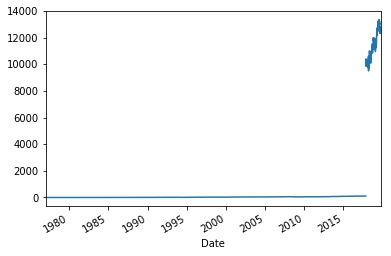

In [80]:
stocks_pep['Prediction'].plot()

# GUI

In [67]:
import dash
import dash_core_components as dcc
import dash_html_components as html

In [68]:
from dash.dependencies import Input, Output
import time
from collections import deque
import plotly.graph_objs as go
import random
from textwrap import dedent as d

In [69]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

In [80]:
app = dash.Dash('Stock Predictions',external_stylesheets = external_stylesheets)

In [81]:
colors1 = {
    'background': '#00CED1',
    'text': '#FFFFFF',
    'fontfamily':'Courier New, monospace'
}
colors2 = {
    'background': '#FFFFFF',
    'text': '#696969',
    'fontfamily':'Courier New, monospace'
}


In [82]:
styles = {
    'pre': {
        'border': 'thin lightgrey solid',
        'overflowX': 'scroll'
    }
}

In [83]:
app.layout = html.Div(children=[ # Title
    html.H1(
        children='Stock Market Prediction',
        style={
            'textAlign': 'center',
            'color': colors1['text'],
            'fontFamily': colors1['fontfamily'],
            'backgroundColor':colors1['background']
        }
    ),
    # Dropdown menu for companies
    html.H3(children= "Agilent Company",
            style={
            'textAlign': 'center',
            'color': colors2['text'],
            'fontFamily': colors2['fontfamily'],
            'backgroundColor':colors2['background']}
            
            
        ),
    
   
    
    
    html.Div([
    dcc.Graph(
        id='basic-interactions',
        figure={
            'data': [
                {'x':stocks_a.index,'y':stocks_a['Close'],'type':'scatter','name':'Daily Closing Price'},
                {'x':stocks_a.index,'y':stocks_a['Prediction'],'type':'scatter','name':'Daily Predicted Closing Price'}    
                ]
        }
        
        )
    ]),
    # Tip of the day.
    html.H4(children='Tip for the day - ', style={
        'textAlign': 'center',
        'color': colors1['text'],
        'fontFamily':colors1['fontfamily'],
        'backgroundColor': colors1['background']
    }),
    
    html.H4(id='live-update-text1',style={
        'textAlign': 'center',
        'color': colors1['text'],
        'fontFamily':colors1['fontfamily'],
    'backgroundColor': colors1['background']}),
    
    
       
    
     html.H3(children= "Apple Inc",
            style={
            'textAlign': 'center',
            'color': colors2['text'],
            'fontFamily': colors2['fontfamily'],
            'backgroundColor':colors2['background']}
            
            
        ),
    
     html.Div([
    dcc.Graph(
        id='basic-interactions1',
        figure={
            'data': [
                
                {'x':stocks_aapl.index,'y':stocks_aapl['Close'],'type':'scatter','name':'Daily Closing Price'},
                {'x':stocks_aapl.index,'y':stocks_aapl['Prediction'],'type':'scatter','name':'Daily Predicted Closing Price'}
                    
                ]
        }
        
        )
    ]),
    # Tip of the day.
    html.H4(children='Tip for the day - ', style={
        'textAlign': 'center',
        'color': colors1['text'],
        'fontFamily':colors1['fontfamily'],
        'backgroundColor': colors1['background']
    }),
    
    html.H4(id='live-update-text2',style={
        'textAlign': 'center',
        'color': colors1['text'],
        'fontFamily':colors1['fontfamily'],
    'backgroundColor': colors1['background']}),
    
    
    html.H3(children= "Ford",
            style={
            'textAlign': 'center',
            'color': colors2['text'],
            'fontFamily': colors2['fontfamily'],
            'backgroundColor':colors2['background']}
            
            
        ),
    
     html.Div([
    dcc.Graph(
        id='basic-interactions2',
        figure={
            'data': [
                
                {'x':stocks_f.index,'y':stocks_f['Close'],'type':'scatter','name':'Daily Closing Price'},
                {'x':stocks_f.index,'y':stocks_f['Prediction'],'type':'scatter','name':'Daily Predicted Closing Price'}   
                ]
        }
        
        )
    ]),
    # Tip of the day.
    html.H4(children='Tip for the day - ', style={
        'textAlign': 'center',
        'color': colors1['text'],
        'fontFamily':colors1['fontfamily'],
        'backgroundColor': colors1['background']
    }),
    
    html.H4(id='live-update-text3',style={
        'textAlign': 'center',
        'color': colors1['text'],
        'fontFamily':colors1['fontfamily'],
    'backgroundColor': colors1['background']}),
    
    html.H3(children= "FedEx",
            style={
            'textAlign': 'center',
            'color': colors2['text'],
            'fontFamily': colors2['fontfamily'],
            'backgroundColor':colors2['background']}
            
            
        ),
    
     html.Div([
    dcc.Graph(
        id='basic-interactions3',
        figure={
            'data': [
                
                {'x':stocks_fdx.index,'y':stocks_fdx['Close'],'type':'scatter','name':'Daily Closing Price'},
                {'x':stocks_fdx.index,'y':stocks_fdx['Prediction'],'type':'scatter','name':'Daily Predicted Closing Price'}
                
                    
                ]
        }
        
        )
    ]),
    # Tip of the day.
    html.H4(children='Tip for the day - ', style={
        'textAlign': 'center',
        'color': colors1['text'],
        'fontFamily':colors1['fontfamily'],
        'backgroundColor': colors1['background']
    }),
    
    html.H4(id='live-update-text4',style={
        'textAlign': 'center',
        'color': colors1['text'],
        'fontFamily':colors1['fontfamily'],
    'backgroundColor': colors1['background']}),
    
    
    html.H3(children= "PepsiCo",
            style={
            'textAlign': 'center',
            'color': colors2['text'],
            'fontFamily': colors2['fontfamily'],
            'backgroundColor':colors2['background']}
            
            
        ),
    
     html.Div([
    dcc.Graph(
        id='basic-interactions4',
        figure={
            'data': [
                
                {'x':stocks_pep.index,'y':stocks_pep['Close'],'type':'scatter','name':'Daily Closing Price'},
                {'x':stocks_pep.index,'y':stocks_pep['Prediction'],'type':'scatter','name':'Daily Predicted Closing Price'}
                
                    
                ]
        }
        
        )
    ]),
    # Tip of the day.
    html.H4(children='Tip for the day - ', style={
        'textAlign': 'center',
        'color': colors1['text'],
        'fontFamily':colors1['fontfamily'],
        'backgroundColor': colors1['background']
    }),
    
    html.H4(id='live-update-text5',style={
        'textAlign': 'center',
        'color': colors1['text'],
        'fontFamily':colors1['fontfamily'],
    'backgroundColor': colors1['background']}),
    
    
        dcc.Interval(
            id='interval-component',
            interval=1*1000, # in milliseconds
            n_intervals=0
        )
])




In [84]:
# Live update tip 
@app.callback(Output('live-update-text1', 'children'),
              [Input('interval-component', 'n_intervals')])
def update_tip1(n):
    last_date = stocks_a.iloc[-1].name
    last_unix = last_date.timestamp()
    one_day = 86400
    next_unix = last_unix + one_day
    next_date = datetime.fromtimestamp(next_unix)


    for i in forecast_set1:
        if datetime.weekday(next_date) == 5 & datetime.weekday(next_date) == 6:
            continue
        next_date = datetime.fromtimestamp(next_unix)
        next_unix += 86400

        stocks_a.loc[next_date] = [np.nan for _ in range(len(stocks_a.columns)-1)]+[i]
        if next_date >= today:
            break
        
    
    
    msg = "Today's Stock Price is : ",i
    return msg
    

In [85]:
# Live update tip 
@app.callback(Output('live-update-text2', 'children'),
              [Input('interval-component', 'n_intervals')])
def update_tip2(n):
    last_date = stocks_aapl.iloc[-1].name
    last_unix = last_date.timestamp()
    one_day = 86400
    next_unix = last_unix + one_day
    next_date = datetime.fromtimestamp(next_unix)


    for i in forecast_set2:
        if datetime.weekday(next_date) == 5 & datetime.weekday(next_date) == 6:
            continue
        next_date = datetime.fromtimestamp(next_unix)
        next_unix += 86400

        stocks_aapl.loc[next_date] = [np.nan for _ in range(len(stocks_aapl.columns)-1)]+[i]
        if next_date >= today:
            break
        
    
    
    msg = "Today's Stock Price is : ",i
    return msg
    

In [86]:
@app.callback(Output('live-update-text3', 'children'),
              [Input('interval-component', 'n_intervals')])
def update_tip3(n):
    last_date = stocks_f.iloc[-1].name
    last_unix = last_date.timestamp()
    one_day = 86400
    next_unix = last_unix + one_day
    next_date = datetime.fromtimestamp(next_unix)


    for i in forecast_set3:
        if datetime.weekday(next_date) == 5 & datetime.weekday(next_date) == 6:
            continue
        next_date = datetime.fromtimestamp(next_unix)
        next_unix += 86400

        stocks_f.loc[next_date] = [np.nan for _ in range(len(stocks_f.columns)-1)]+[i]
        if next_date >= today:
            break
    msg = "Today's Stock Price is : ",i
    return msg
    
    


In [87]:
@app.callback(Output('live-update-text4', 'children'),
              [Input('interval-component', 'n_intervals')])
def update_tip4(n):
    last_date = stocks_fdx.iloc[-1].name
    last_unix = last_date.timestamp()
    one_day = 86400
    next_unix = last_unix + one_day
    next_date = datetime.fromtimestamp(next_unix)


    for i in forecast_set4:
        if datetime.weekday(next_date) == 5 & datetime.weekday(next_date) == 6:
            continue
        next_date = datetime.fromtimestamp(next_unix)
        next_unix += 86400

        stocks_fdx.loc[next_date] = [np.nan for _ in range(len(stocks_fdx.columns)-1)]+[i]
        if next_date >= today:
            break
    msg = "Today's Stock Price is : ",i
    return msg  
    

In [88]:
@app.callback(Output('live-update-text5', 'children'),
              [Input('interval-component', 'n_intervals')])
def update_tip5(n):
    last_date = stocks_pep.iloc[-1].name
    last_unix = last_date.timestamp()
    one_day = 86400
    next_unix = last_unix + one_day
    next_date = datetime.fromtimestamp(next_unix)


    for i in forecast_set5:
        if datetime.weekday(next_date) == 5 & datetime.weekday(next_date) == 6:
            continue
        next_date = datetime.fromtimestamp(next_unix)
        next_unix += 86400

        stocks_pep.loc[next_date] = [np.nan for _ in range(len(stocks_pep.columns)-1)]+[i]
        if next_date >= today:
            break
    msg = "Today's Stock Price is : ",i
    return msg 
        

In [ ]:
if __name__ == '__main__':
    app.run_server()

 * Serving Flask app "Stock Predictions" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [28/Sep/2019 12:07:27] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Sep/2019 12:07:27] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Sep/2019 12:07:27] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Sep/2019 12:07:27] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Sep/2019 12:07:27] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Sep/2019 12:07:27] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Sep/2019 12:07:28] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Sep/2019 12:07:28] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Sep/2019 12:07:28] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Sep/2019 12:07:28] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Sep/2019 12:07:28] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Sep/2019 